In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Análise Exploratória de Dados

Autor: Lara Esquivel de Brito Santos

Neste notebook está descreve o passo a passo da análise exploratória dos dados imobiliários contidos no arquivo  teste_indicium_precificacao.csv

In [2]:
df = pd.read_csv('teste_indicium_precificacao.csv') #leitura do csv
df.head() #primeiros registros do dataframe

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Cada coluna possui os seguintes tipos de dados, segundo o pandas:

In [3]:
df.dtypes

id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object

- **id**: Embora seja um valor `int64`, é um identificador.
- **nome**: Nome do anúncio, variável **categórica nominal**.
- **host_id**: é um identificador do anfitrião.
- **host_name**: Variável **nominal**, representando o nome do anfitrião.
- **bairro_group**: Variável **nominal**, que categoriza os grupos de bairros.
- **latitude**: Variável **contínua**, representando uma coordenada geográfica.
- **longitude**: Variável **contínua**, representando uma coordenada geográfica.
- **room_type**: Variável **nominal**, descrevendo o tipo de quarto.
- **price**: Representa o preço do aluguel. Embora devesse ser uma variável **contínua** (podendo incluir valores decimais), nesta base de dados não possui valores decimais.
- **minimo_noite**: Variável **discreta**, pois conta o número mínimo de noites para o aluguel temporário.
- **numero_de_reviews**: Variável **discreta**, que representa a contagem de avaliações.
- **ultima_review**: É uma data. Porém, o pandas não reconheceu como tal e precisa ser convertida para o formato `datetime`.
- **reviews_por_mes**: Variável **contínua**, representando a média de avaliações mensais.
- **calculated_host_listings_count**: Variável **discreta**, pois é uma contagem.
- **disponibilidade**: Variável **discreta**, que indica o número de dias em que o anúncio está disponível para reserva.





Os nulos incluem os atributos nome do anúncio, o nome do hospedador do anúncio, a ultima review e as reviews por mês, incialmente não tratarei isto

In [4]:
df.isnull().sum() #mostrando o número de registros de cada coluna que possuem valor vazio

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

## Analisando dados básicos para criar hipóteses

Considerando que o cliente quer um modelo de previsão de preços, o questionamento incial:  é como os atributos influenciam o preço? 

Os primeiros atributos que provavelmente afetam é o tipo de imóvel e o bairro, uma casa de três quartos e dois banheiros por ocupar uma área maior deveria ser mais cara que um apartamento de dois quartos e um banheiro, todavia o bairro do imóvel afeta esses valores, por característica do próprio bairro, como sendo mais distante do centro ou mais proximo de uma universidade.

Consequentemente latitude e longitude estão relacionadas ao bairro, o número total de reviews e as reviews por mês podem estar relacionadas ao bairro populares, onde as pessoas mais buscam. Enquanto a última review indica se o anuncio está ativo, reviews mais antigas podem ter o preço mais baixo. Enquanto disponibilidade está relacionada a sazionalidade e demanda, o que pode influenciar o preço tanto positivamente quanto negativamente.

In [5]:
df.select_dtypes(include=['number']).describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.select_dtypes(exclude=['number']).describe()

,nome,host_name,bairro_group,bairro,room_type,ultima_review
count,48878,48873,48894,48894,48894,38842
unique,47904,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


Em cima desses dados o que podemos perceber que temos valores discrepantes de preço, o menor valor é 0 doláres e o maior valor é 10.000 doláres. Inclusive são estranhos os registros cujo o valor de aluguel está como 0 de inicio, e da mesma forma para disponibilidade, isto pode ser ruídos na base de dados, ou o que pode ser cogitado é que é um imóvel comunitário por isso tem valor 0, enquanto a disponibilidade é o fato do anunciante ter tirado o anúncio de circuilação, ou não ter mais locações, isso corresponde ao primeiro quartil do conjunto de dados, não deve ser um ruído. Mas por esse motivo, removi todos os registros cujo a locação tem valor 0.

In [9]:
df = df[df['price'] != 0]

Analisando preço e bairro inicialmente, decidi criar um boxplot para verificar como os valores de imóveis se distribuem para cada bairro, como temos muitos bairros, 221 vou gerar em cima do bairro_group

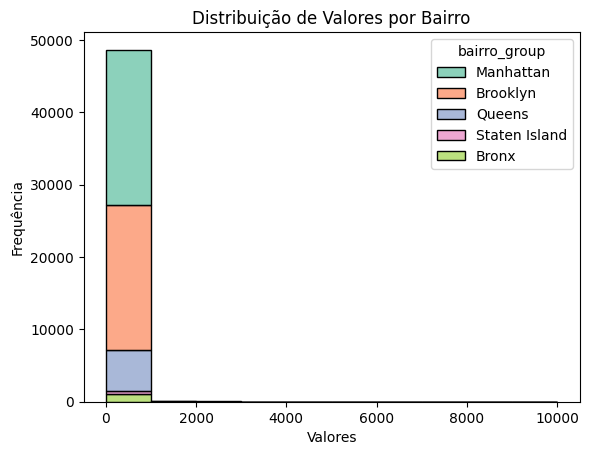

In [19]:
sns.histplot(data=df, x='price', hue='bairro_group', bins=20, multiple='stack', palette='Set2')
plt.title('Distribuição de Valores por Bairro')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()